In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('108年臺北市道路交通事故斑點圖.xlsm')
df.head(5)

,時間,嚴重度,地址,X,Y,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10)
0,2019/1/2-08:37,2,大同區重慶北路3段137巷與民族西路182巷口,121.514854,25.068009,2,1022.8,1026.5,1025.5,2019-01-02 09:05:00,...,1.1,2019-01-02 07:55:00,0.0,0.0,4.03,12.5,-0.2,3.0,2019-01-02 13:00:00,10.0
1,2019/1/9-10:59,2,大同區重慶北路1段與天水路口,121.514213,25.053566,9,1020.1,1023.7,1022.9,2019-01-09 08:11:00,...,0.0,...,1.2,11.3,9.13,25.8,2.1,5.0,2019-01-09 12:00:00,7.7
2,2019/2/26-00:40,3,大同區延平北路3段25-3號,121.511157,25.064378,26,1014.9,1018.5,1017.4,2019-02-26 08:36:00,...,0.0,...,2.7,23.5,8.97,15.8,-2.8,4.0,2019-02-26 15:00:00,7.9
3,2019/5/23-16:20,3,大同區錦西街38巷1號,121.520020,25.059364,23,1008.3,1011.8,1010.2,2019-05-23 10:13:00,...,1.3,2019-05-23 09:50:00,3.6,26.8,11.05,17.5,-2.2,8.0,2019-05-23 14:00:00,8.6
4,2019/6/28-08:00,3,大同區環河北路1段與忠孝西路2段口,121.506073,25.049719,28,999.4,1002.8,1000.8,2019-06-28 07:04:00,...,0.0,...,6.3,46.2,20.01,42.5,6.1,9.0,2019-06-28 11:00:00,5.2


In [3]:
df_severity1=df[df['嚴重度']==1]
df_severity1.head(5)

,時間,嚴重度,地址,X,Y,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10)
429,2019/4/17-14:50,1,大同區長安西路66號建成國中地下停車場出入口,121.519561,25.050322,17,1008.9,1012.4,1010.8,2019-04-17 09:09:00,...,0.0,...,7.0,55.0,18.49,21.0,2.6,8.0,2019-04-17 12:00:00,3.8
800,2019/7/7-19:17,1,大同區延平北路3段與民族西路口,121.511012,25.068670,7,1000.7,1004.1,1003.4,2019-07-07 22:30:00,...,0.0,...,5.2,38.3,17.72,31.5,2.9,12.0,2019-07-07 12:00:00,8.2
1010,2019/7/14-06:44,1,大同區環河北路2段與敦煌路口,121.509502,25.076277,14,1000.6,1004.0,1003.0,2019-07-14 21:52:00,...,2.5,2019-07-14 18:12:00,5.6,41.4,18.90,31.3,-4.9,12.0,2019-07-14 13:00:00,7.9
1318,2019/4/9-11:13,1,大同區重慶北路3段120巷與延平北路3段83巷口,121.511538,25.067243,9,1006.5,1010.0,1008.9,2019-04-09 07:41:00,...,0.0,...,4.6,36.7,13.40,9.5,3.2,6.0,2019-04-09 12:00:00,6.2
1674,2019/8/18-06:20,1,大同區重慶北路1段與鄭州路口,121.513394,25.049509,18,1001.8,1005.2,1003.1,2019-08-18 22:27:00,...,14.0,2019-08-18 15:41:00,3.4,26.4,10.75,25.5,-7.0,6.0,2019-08-18 11:00:00,8.9


In [4]:
d1_list=[]
for i in df_severity1['地址']:
    d1_list.append(i[:3])
d1=pd.DataFrame(pd.DataFrame(d1_list,columns=['行政區']).groupby('行政區').size(),columns=['車禍數量'])
d1
# plt.bar(d1.index,d1['車禍數量'])
# plt.xlabel('行政區')
# plt.ylabel('車禍數量')
# plt.title('嚴重度1之行政區長條圖')

,車禍數量
行政區,
中山區,11
中正區,3
信義區,5
內湖區,10
北投區,11
南港區,1
士林區,10
大同區,6
大安區,15


In [5]:
df_severity2=df[df['嚴重度']==2]
df_severity2.head(5)

,時間,嚴重度,地址,X,Y,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10)
0,2019/1/2-08:37,2,大同區重慶北路3段137巷與民族西路182巷口,121.514854,25.068009,2,1022.8,1026.5,1025.5,2019-01-02 09:05:00,...,1.1,2019-01-02 07:55:00,0.0,0.0,4.03,12.5,-0.2,3.0,2019-01-02 13:00:00,10.0
1,2019/1/9-10:59,2,大同區重慶北路1段與天水路口,121.514213,25.053566,9,1020.1,1023.7,1022.9,2019-01-09 08:11:00,...,0.0,...,1.2,11.3,9.13,25.8,2.1,5.0,2019-01-09 12:00:00,7.7
5,2019/1/18-09:54,2,大同區民權西路與蘭州街口,121.514705,25.062889,18,1019.2,1022.8,1022.3,2019-01-18 00:07:00,...,0.0,...,9.0,83.9,14.87,33.8,2.4,6.0,2019-01-18 13:00:00,2.0
7,2019/1/23-08:31,2,大同區承德路1段與長安西路口,121.517100,25.050867,23,1017.6,1021.3,1019.2,2019-01-23 09:08:00,...,0.0,...,2.0,18.5,6.92,16.5,1.8,4.0,2019-01-23 11:00:00,7.8
9,2019/1/28-18:45,2,大同區延平北路2段61巷與延平北路2段口口,121.512052,25.055509,28,1018.1,1021.7,1020.2,2019-01-28 09:05:00,...,0.0,...,8.5,78.1,14.98,26.3,2.9,6.0,2019-01-28 13:00:00,3.3


Text(0.5, 1.0, '嚴重度2之行政區長條圖')

C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s

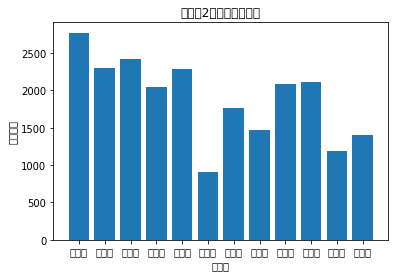

In [26]:
d2_list=[]
for i in df_severity2['地址']:
    d2_list.append(i[:3])
d2=pd.DataFrame(pd.DataFrame(d2_list,columns=['行政區']).groupby('行政區').size(),columns=['車禍數量'])
d2=d2[d2['車禍數量']>10]
# d2
plt.bar(d2.index,d2['車禍數量'])
plt.xlabel('行政區')
plt.ylabel('車禍數量')
plt.title('嚴重度2之行政區長條圖')

In [7]:
df_severity3=df[df['嚴重度']==3]
df_severity3.head(5)

,時間,嚴重度,地址,X,Y,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10)
2,2019/2/26-00:40,3,大同區延平北路3段25-3號,121.511157,25.064378,26,1014.9,1018.5,1017.4,2019-02-26 08:36:00,...,0.0,...,2.7,23.5,8.97,15.8,-2.8,4.0,2019-02-26 15:00:00,7.9
3,2019/5/23-16:20,3,大同區錦西街38巷1號,121.520020,25.059364,23,1008.3,1011.8,1010.2,2019-05-23 10:13:00,...,1.3,2019-05-23 09:50:00,3.6,26.8,11.05,17.5,-2.2,8.0,2019-05-23 14:00:00,8.6
4,2019/6/28-08:00,3,大同區環河北路1段與忠孝西路2段口,121.506073,25.049719,28,999.4,1002.8,1000.8,2019-06-28 07:04:00,...,0.0,...,6.3,46.2,20.01,42.5,6.1,9.0,2019-06-28 11:00:00,5.2
6,2019/1/22-16:00,3,大同區鄭州路127號,121.510796,25.050375,22,1018.9,1022.6,1020.3,2019-01-22 09:29:00,...,0.2,2019-01-22 11:20:00,0.0,0.0,0.00,10.8,-1.6,1.0,2019-01-22 13:00:00,10.0
8,2019/1/23-10:30,3,大同區市民大道1段209號,121.518535,25.049116,23,1017.6,1021.3,1019.2,2019-01-23 09:08:00,...,0.0,...,2.0,18.5,6.92,16.5,1.8,4.0,2019-01-23 11:00:00,7.8


Text(0.5, 1.0, '嚴重度3之行政區長條圖')

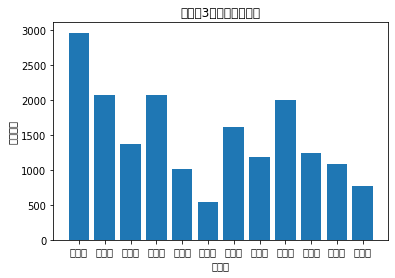

In [27]:
d3_list=[]
for i in df_severity3['地址']:
    d3_list.append(i[:3])
d3=pd.DataFrame(pd.DataFrame(d3_list,columns=['行政區']).groupby('行政區').size(),columns=['車禍數量'])
d3=d3[d3['車禍數量']>10]
# d3
plt.bar(d3.index,d3['車禍數量'])
plt.xlabel('行政區')
plt.ylabel('車禍數量')
plt.title('嚴重度3之行政區長條圖')